## Data Preprocessing and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [4]:
df = pd.read_csv('../data/iterim/bikes-02-new_features.csv')
df

,brand_name,model_name,motor_size,model_year,kms_driven,mileage,owner,power,price
0,Bajaj,Avenger,220.0,2017,17000.0,35.0,1,19.0,63500
1,Royal-Enfield,Classic,350.0,2016,50000.0,35.0,1,19.8,115000
2,Hyosung,GT250R,250.0,2012,14795.0,30.0,1,28.0,300000
3,Bajaj,Dominar,400.0,2017,28.0,28.0,1,34.5,100000
4,Jawa,Perak,330.0,2020,2000.0,0.0,1,30.0,197500
...,...,...,...,...,...,...,...,...,...
7543,Yamaha,YZF-R15,150.0,2011,7000.0,42.0,1,16.0,55000
7544,Bajaj,Discover,100.0,2015,80.0,80.0,1,7.7,28000
7545,Bajaj,Pulsar,180.0,2016,6407.0,65.0,1,17.0,61740
7546,Bajaj,V15,150.0,2016,7524.0,57.0,1,11.8,49000


<AxesSubplot:>

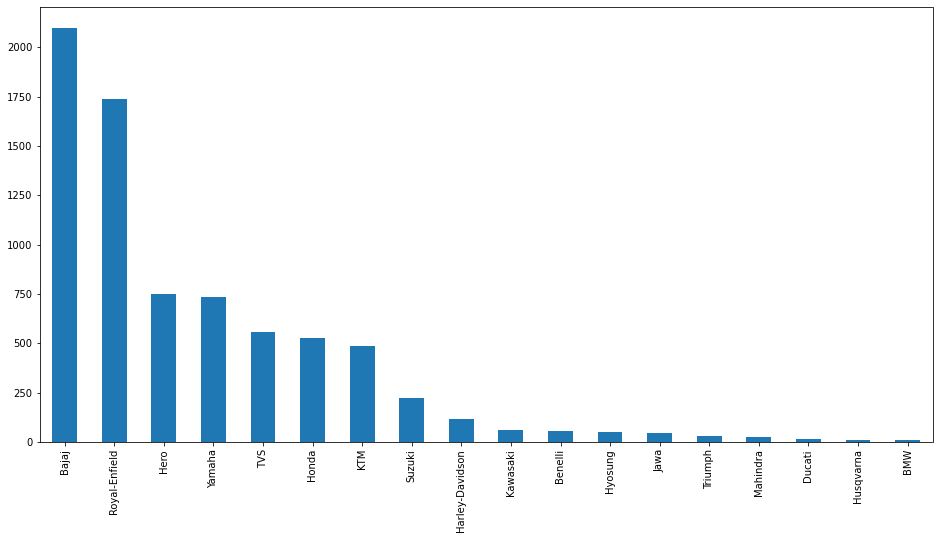

In [5]:
# Search for the most sales by brand

plt.figure(figsize=(16, 8))
df['brand_name'].value_counts().plot(kind='bar')

<AxesSubplot:>

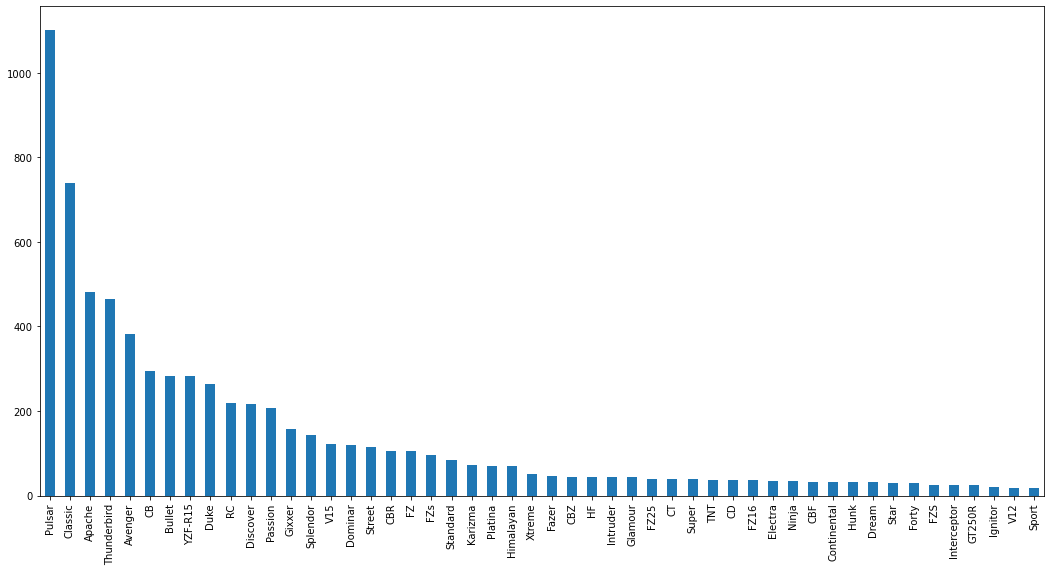

In [6]:
# Search for the most sales by model

plt.figure(figsize=(18,9))
df['model_name'].value_counts()[:50].plot(kind='bar')

It's clear Bajaj and Royal Enfield brands are the most popular sales
and Pulsar model is the most popular sales

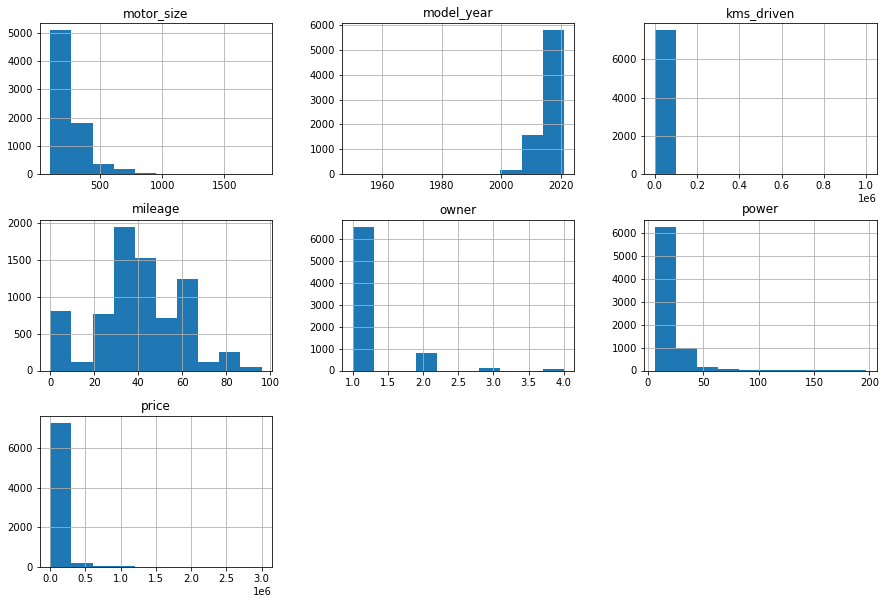

In [7]:
# take a look for the histogram of each feature

df.hist(figsize=(15, 10))
plt.show()

Look a weird behaviour in "kms_driven" feature

<AxesSubplot:xlabel='kms_driven'>

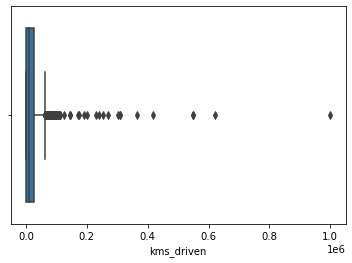

In [8]:
sns.boxplot(x=df['kms_driven'])

In effect have rows with more than 1M in the column

In [9]:
df = df[df['kms_driven'] < df['kms_driven'].quantile(0.975)]

<AxesSubplot:xlabel='kms_driven'>

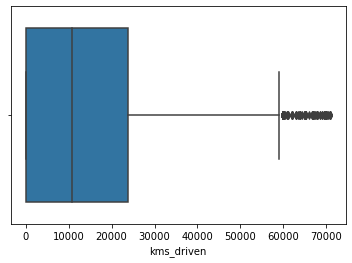

In [10]:
sns.boxplot(x=df['kms_driven'])

New distribution shows another outliers, but are realistic values

<AxesSubplot:xlabel='price'>

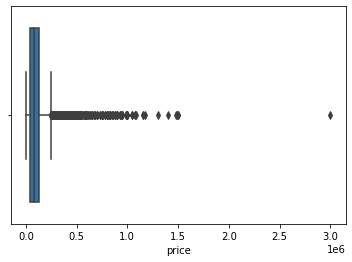

In [11]:
# Now teke a look in the "price column"
sns.boxplot(x=df['price'])

Clearly have a outlier with 3M value, i'll fix it

<AxesSubplot:xlabel='price'>

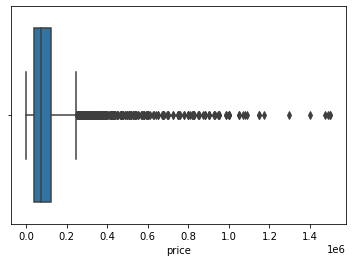

In [12]:
df = df[df['price'] < 3000000]
sns.boxplot(x=df['price'])

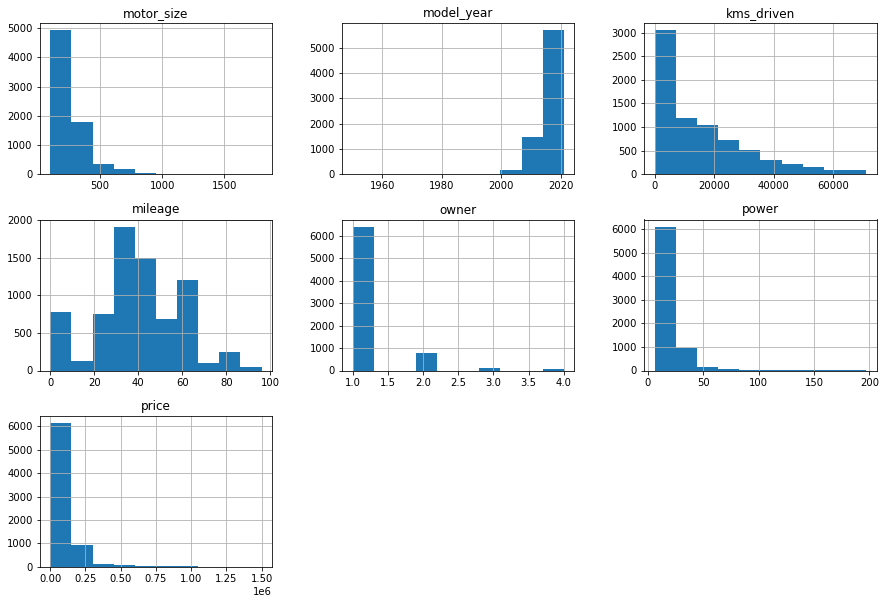

In [13]:
df.hist(figsize=(15, 10))
plt.show()

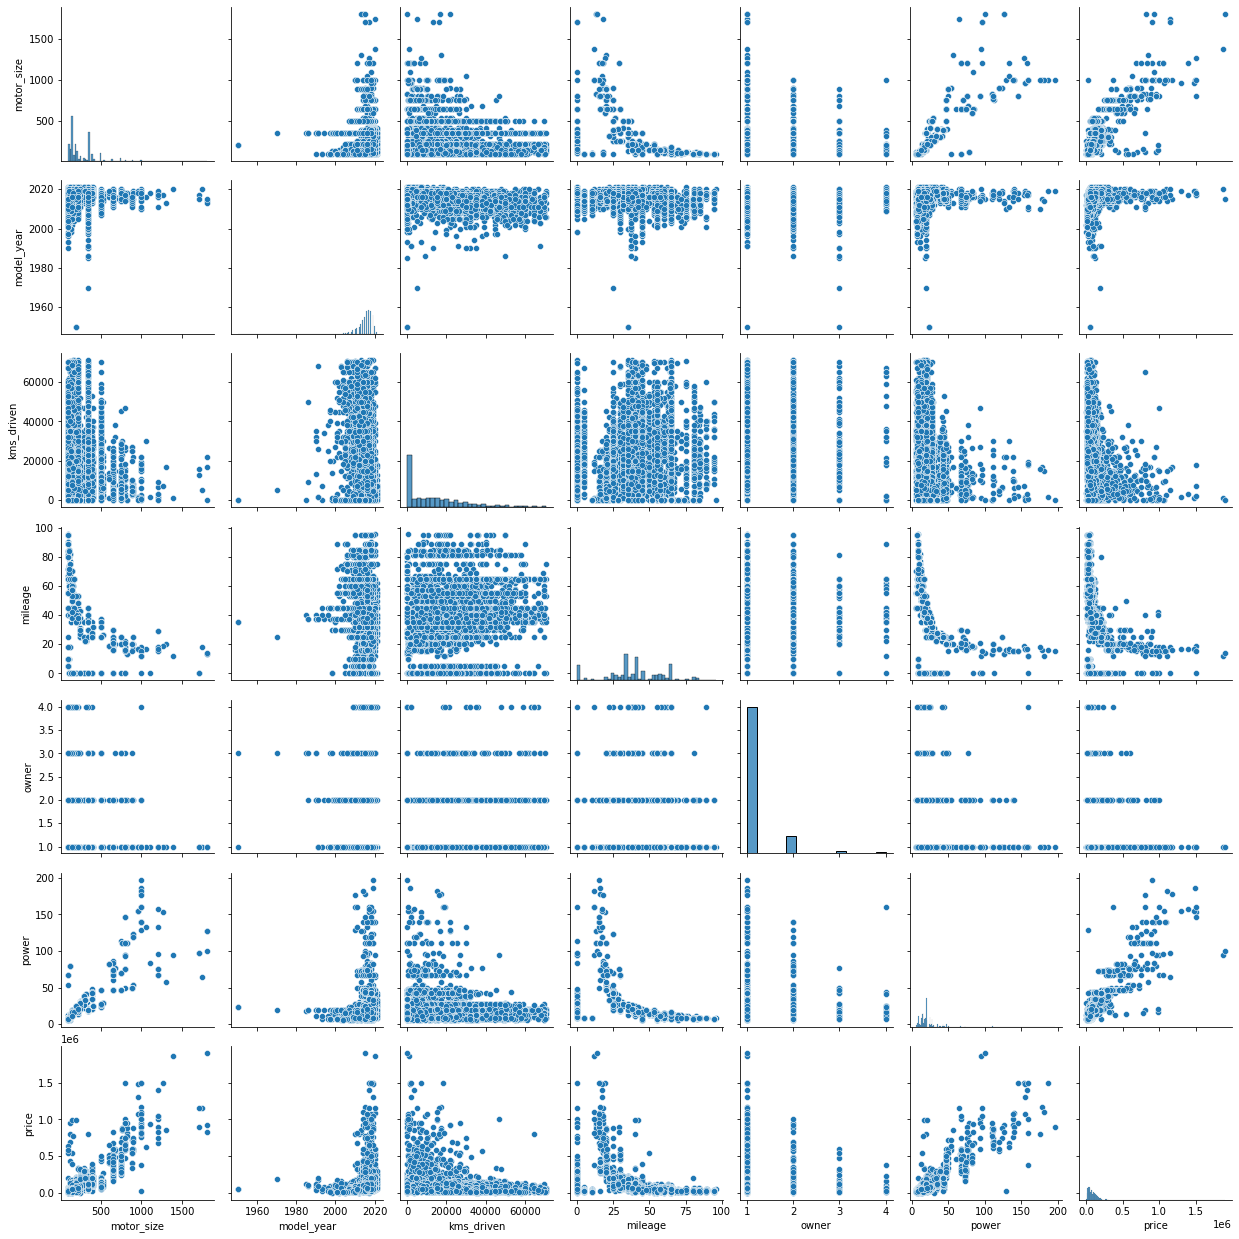

In [31]:
sns.pairplot(df)

<AxesSubplot:>

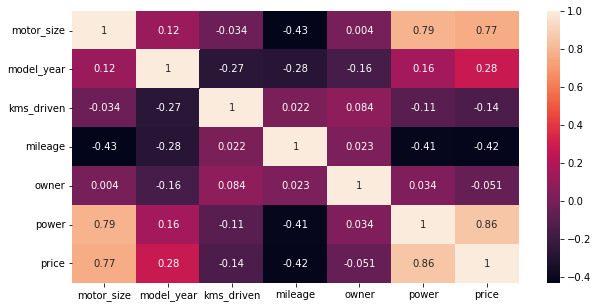

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

Can see that the *power* and the *motor size* is bigger influenced in **price**,  and have negative but strong correlation with the *mileage*.

In [15]:
DATA_DIR_iterim = '../data/iterim/'
df.to_csv(os.path.join(DATA_DIR_iterim, 'bikes-03-no_outliers.csv'), index=False)